## Analysis of eLearning Courses

We're working for an an e-learning company that offers courses on programming. Most of the courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc.

We want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the two best markets to advertise our product in.

### Try public Data Source free availabe on-line


Surveys could be organized for a couple of different markets to find out which would the best choices for advertising. This is very costly, cheaper option is to explore of public data already collected by someone else first.

One good candidate is the data from freeCodeCamp's 2017 New Coder Survey. freeCodeCamp is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in this GitHub repository (https://github.com/freeCodeCamp/2017-new-coder-survey).

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline

In [2]:
surveyData=pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv',low_memory=False)


In [3]:
surveyData.shape

(18175, 136)

In [4]:
surveyData.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Do the participants of the free dataset interests are same as our offered mobile courses ?

Most of the courses we offer are on web and mobile development, but we also cover many other domains, like data science, game development, etc. For our analysis to be meaningful, we need to check if the survey is also target to our intended course students.

First we check the distribution (by percentage) 'Job Role Intrest' column of the survey


<br>

In [5]:
jobRoleInterestDist=((surveyData['JobRoleInterest'].value_counts()/
      surveyData['JobRoleInterest'].value_counts().sum())*100)

jobRoleInterestDist=jobRoleInterestDist.sort_values(ascending=False)

print(jobRoleInterestDist[:20])
print('\n\n')

Full-Stack Web Developer                                                       11.770595
  Front-End Web Developer                                                       6.435927
  Data Scientist                                                                2.173913
Back-End Web Developer                                                          2.030892
  Mobile Developer                                                              1.673341
Game Developer                                                                  1.630435
Information Security                                                            1.315789
Full-Stack Web Developer,   Front-End Web Developer                             0.915332
  Front-End Web Developer, Full-Stack Web Developer                             0.800915
  Product Manager                                                               0.786613
Data Engineer                                                                   0.758009
  User Experience Des

### Simple counting on Job Role Interest Column cannot tell dataset match our study interest

The top 3 job interests are Full-Stack/Front-End We Developer and Data Scientest,which account for about 20% of the Job Interest. 

However, it is noticed that the 'Job Role Intrest' can be composed of multiple interests. To get a clearer understanding, we need to split the respondent interests from the column and count the number of respondent interest in Web and/or Mobile Development.  

<br>

In [6]:
jobRoleInterestList=surveyData.dropna(subset=['JobRoleInterest']).copy()

interestedInMobileorWeb={'Interested':0,
                        'Not Interested':0}

for rowInterest in jobRoleInterestList['JobRoleInterest']:
    rowInterestList=rowInterest.split(',')
    if any('Mobile Developer' in interestStr for interestStr in rowInterestList) or \
       any('Web Developer' in interestStr for interestStr in rowInterestList):
       interestedInMobileorWeb['Interested']+=1
    else:
       interestedInMobileorWeb['Not Interested']+=1

interestedInMobileorWeb

{'Interested': 6030, 'Not Interested': 962}

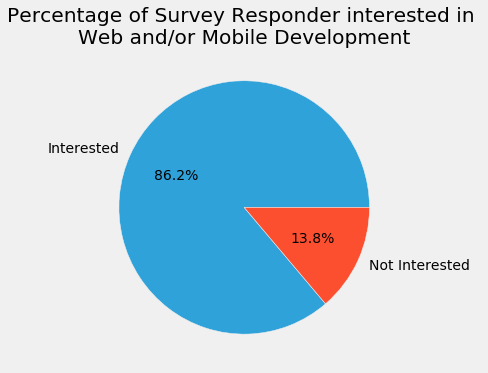

In [7]:
plt.style.use('fivethirtyeight')
pd.DataFrame.from_dict(interestedInMobileorWeb,orient='index').plot.pie(subplots=True,figsize=(5,5.3),autopct='%.1f%%',legend=None)
plt.ylabel('')
plt.title('Percentage of Survey Responder interested in \nWeb and/or Mobile Development')



### The dataset matches our research target 
By split and count individual intrest in the Job Role Interest column, 6030 (86.2%) out of the 6992 repondents responded on Job Role Interest are interested in Web and/or Mobile Development.  So we can conclude the survey target are basically the same group of people that we are interested in prompting our courses.

<br>

### Country of Interest

We would like to put our advertisment resource on country that has large potential customer.  So the number of respondent form each country are count and analysed as below.

In [8]:
surveyDataWithJobInterest=jobRoleInterestList.copy()

countryDist=pd.DataFrame(surveyDataWithJobInterest['CountryLive'].value_counts())
countryDist['percentage']=(countryDist['CountryLive']/countryDist['CountryLive'].sum())*100

countryDist.head(10)

,CountryLive,percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


In [9]:
surveyDataWithJobInterest['MonthsProgramming'].replace(0,1,inplace=True)

surveyDataWithJobInterest['MonthlySpent']=surveyDataWithJobInterest['MoneyForLearning']/surveyDataWithJobInterest['MonthsProgramming']
surveyDataWithJobInterest['MonthlySpent'].isnull().sum()

675

In [10]:
surveyDataWithJobInterest=surveyDataWithJobInterest.dropna(subset=['MonthlySpent']).copy()
surveyDataWithJobInterest['MonthlySpent'].isnull().sum()

0

In [11]:
surveyDataWithJobInterest=surveyDataWithJobInterest.dropna(subset=['CountryLive']).copy()
surveyDataWithJobInterest['CountryLive'].isnull().sum()

0

### Interested Countries Are ...

From the above, the top 4 countries of the survey take up 60% of the suvey respondents.  And the remaing country only take up less than 2% of respondents.  So we decided to concetrate our analysis on the top 4 and they are put into a list for easier follow-up programming.

In [12]:
interestedCountry=countryDist.index[0:4].tolist()
interestedCountry

['United States of America', 'India', 'United Kingdom', 'Canada']

### Analysis of monthly spending of top 4 countries

Our monthly course fee is $59, we would like to see the partioners in the top 4 countries are willing to pay for that price.

So the mean monthly spending of the top 4 coumtires are calculated as below.  USA is the top, India come second then Canada all partioners in these 3 countries average spending is more than $59 but ... <i>we also need to consider<i/> ...

<br>

In [13]:
surveyDataWithJobInterest[surveyDataWithJobInterest['CountryLive'].isin(interestedCountry)].groupby('CountryLive').mean()['MonthlySpent'].sort_values(ascending=False)

CountryLive
United States of America    227.997996
India                       135.100982
Canada                      113.510961
United Kingdom               45.534443
Name: MonthlySpent, dtype: float64

### Is there outliners ?
The results for the United Kingdom and Canada are surprisingly low relative to the values we see for India. As we'd intuitively expect people from more affluent UK and Canada are willing to spend more on learning than less affluent people from India.

It is worth to explore if there is ouliners in India distorted our 'common sense'.
<br>

In [14]:
interestedCountryMonthlySpent=surveyDataWithJobInterest[surveyDataWithJobInterest['CountryLive'].isin(interestedCountry)]


In [15]:
interestedDist=pd.DataFrame()

for country in interestedCountry:
    interestedDist[country]=interestedCountryMonthlySpent[interestedCountryMonthlySpent['CountryLive']==country]['MonthlySpent'].describe()

interestedDist    

,United States of America,India,United Kingdom,Canada
count,2933.000000,463.000000,279.000000,240.000000
mean,227.997996,135.100982,45.534443,113.510961
std,1940.245614,692.960378,162.311836,441.014158
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,3.333333,0.000000,0.000000,0.000000
75%,50.000000,13.250000,20.416667,25.000000
max,80000.000000,10000.000000,1400.000000,5000.000000


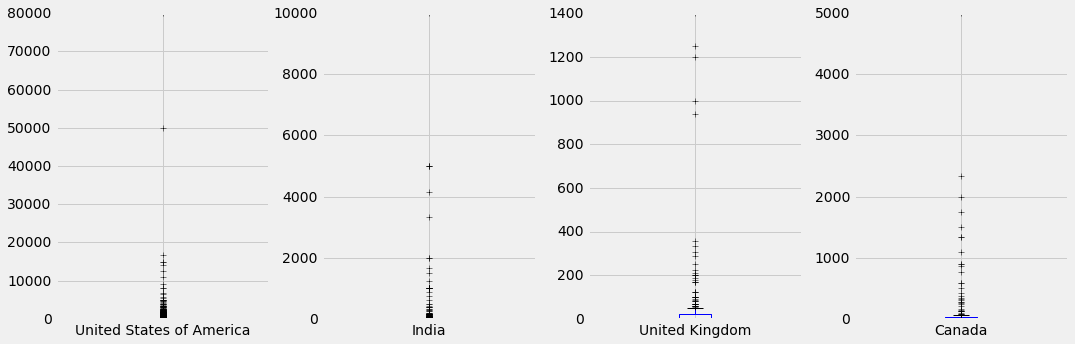

In [16]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(15,5))
axs=[fig.add_subplot(141),
     fig.add_subplot(142),
     fig.add_subplot(143),
     fig.add_subplot(144)]    
plt.subplots_adjust(hspace=10)
plt.tight_layout()

for country,ax in zip(interestedCountry,axs):
    col=interestedCountryMonthlySpent[interestedCountryMonthlySpent['CountryLive']==country]['MonthlySpent']
    ax.boxplot(x=col.tolist(),labels=[country])
    
plt.show()    

### Outliners are common in the top 4 countries
The summary statistics (DataFrame.describe()) and boxplot above clearly indicated the distribtion of intrested country are serioulsy left skewed by outliners in these country.

This analysis does not attemp to explore explaination on the cause of outliners, but rather, to focus on IT partitioner's the monthly expending of courses to learn their desired skill.  So outliner above 3 standard deviation (6 sigma) of country respective distrbution are removed and the mean is recalcuated.   

In [17]:
sigma=3


nonOutlineMask=[False for x in interestedCountryMonthlySpent.iterrows()]

for country in interestedCountry:
    std=interestedCountryMonthlySpent[interestedCountryMonthlySpent['CountryLive']==country]['MonthlySpent'].std()
    outlineLimit=sigma*std
    mask=((interestedCountryMonthlySpent['CountryLive']==country) &
         (interestedCountryMonthlySpent['MonthlySpent']<outlineLimit))
    nonOutlineMask=nonOutlineMask | mask
    

interestedCountryMonthlySpentNoOutline=interestedCountryMonthlySpent[nonOutlineMask==True]
interestedCountryMonthlySpentNoOutline.groupby('CountryLive').mean()['MonthlySpent'].sort_values(ascending=False)

CountryLive
United States of America    142.654608
India                        65.758763
Canada                       51.454066
United Kingdom               25.245838
Name: MonthlySpent, dtype: float64

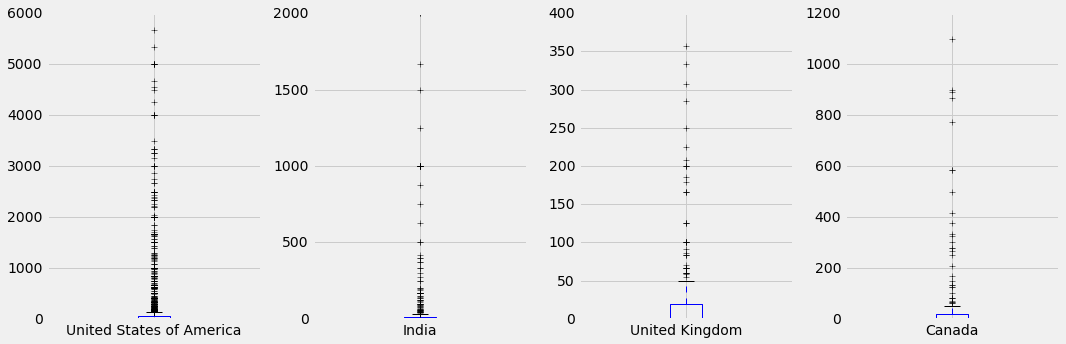

In [18]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(15,5))
axs=[fig.add_subplot(141),
     fig.add_subplot(142),
     fig.add_subplot(143),
     fig.add_subplot(144)]    
plt.subplots_adjust(hspace=10)
plt.tight_layout()

for country,ax in zip(interestedCountry,axs):
    col=interestedCountryMonthlySpentNoOutline[interestedCountryMonthlySpentNoOutline['CountryLive']==country]['MonthlySpent']
    ax.boxplot(x=col.tolist(),labels=[country])
    
plt.show()    

In [19]:
interestedDistNoOutline=pd.DataFrame()

for country in interestedCountry:
    interestedDistNoOutline[country]=interestedCountryMonthlySpentNoOutline[interestedCountryMonthlySpentNoOutline['CountryLive']==country]['MonthlySpent'].describe()
    
interestedDistNoOutline
    

,United States of America,India,United Kingdom,Canada
count,2920.000000,457.000000,274.000000,233.000000
mean,142.654608,65.758763,25.245838,51.454066
std,502.692169,233.452738,57.025994,155.765693
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,3.333333,0.000000,0.000000,0.000000
75%,50.000000,12.500000,20.000000,20.000000
max,5666.666667,2000.000000,357.142857,1100.000000


### Result after outliner removal

The summary statistics and boxplot after outliner removal are less skewed (smaller standard deviation and smaller maximum).  It also shows that only USA and India partitioner spending means (\$142 and \$65 respectively) are above our couse monthly charge of $59.

### Conculsion

From the result after outlner removal, we can safely concluded USA is the market worth for investing advertering program as she has the largest deveoloper population has inerested in our course subject and the developer mean expenditure on learning (\$142) there are well above our course cost of \$59.  

### Further on the conclusion ...

On further analysis of percentlie value of our course fee (\$59) in each of the top countries as below, 22% of developers in USA are spending \$59 or more on learning. 22% is a huge market given the large number of developers in USA. 


It is also worth to note 15% of developrs in India are also willing to spend \$59 or more, and the mean spending of India is $65, which is also above our course fee.

Given India is the largest IT outsource servicing country in the World, India may have a large developer popupulation.  India may be a potentail market that worth for further exploration.  So it is also suggest to conduct further marketing research on India to collect more data for further analysis.

In [21]:
coursePrice=59

percentileTable=[]

for country in interestedCountry:
    percentile=stats.percentileofscore(interestedCountryMonthlySpentNoOutline[interestedCountryMonthlySpentNoOutline['CountryLive']==country]['MonthlySpent'],coursePrice)
    percentileTable.append([country,100-percentile])
    #print(country,100-percentile)

    
pd.DataFrame(percentileTable,columns=['country','100-percentile'])    

,country,100-percentile
0,United States of America,22.294521
1,India,15.098468
2,United Kingdom,13.868613
3,Canada,14.163090
